In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import uuid
from datetime import datetime as dt
from copy import deepcopy

In [20]:
def do_we_need_to_sharpen(image):
    var = cv2.Laplacian(image, cv2.CV_64F).var()
    if var <=1000: #tentative threshold, can change.
        return True
    else:
        return False

def sharpen_image(input_path, output_path, plot = False):
    if not os.path.exists(output_path):
        os.makedirs(output_path)
    
    filename = (os.path.split(input_path)[-1]).split('.')[0]
    
    kernel_centres = list(range(5,100))
    
    image = cv2.imread(input_path)
    
    if do_we_need_to_sharpen(image)==True:
        print('Image needs sharpening')
        for kernel_centre in kernel_centres:
            out_image = None
            sharpen = np.array([[0, -1, 0 ],
                               [-1, kernel_centre, -1],
                               [0, -1, 0]])
            sharp = cv2.filter2D(image, -1, sharpen)
            
            if do_we_need_to_sharpen(sharp)==False:
                out_image = sharp
                break
    
    out = output_path + '/' + filename + dt.now().strftime("%Y%m%d_%H%M") +'_sharpened.jpg'
    
    cv2.imwrite(out, sharp)
    
    if plot == True: 
        fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
        
        if do_we_need_to_sharpen(image)==True: 
            ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            ax[0].set(title=f'Original image: Variance of Laplacian:{cv2.Laplacian(image, cv2.CV_64F).var():.3f}')
            ax[1].imshow(cv2.cvtColor(out_image, cv2.COLOR_BGR2RGB))
            ax[1].set(title=f'Sharpened image: Variance of Laplacian:{cv2.Laplacian(out_image, cv2.CV_64F).var():.3f}')
            
        else:
            ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            ax[0].set(title='Original image')


Image needs sharpening


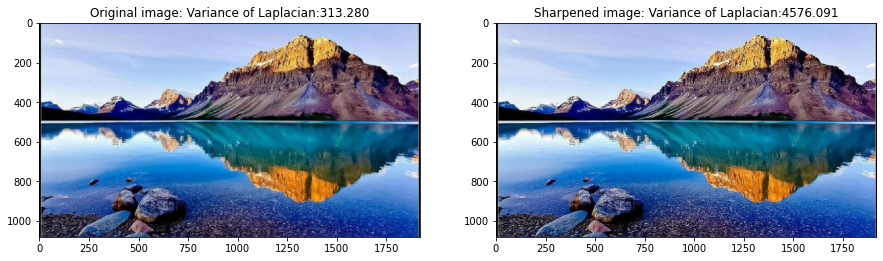

In [22]:
sharpen_image('test1.jpg','./sharpened',plot=True)